# What is vectorisation and why do we need to do it?

This post is comprised of the Jupyter notebook that was used during a Coffee & Coding session providing an overview of text vectorization, a key concept in Natural Language Processing.

Let's take as our first example a dataset of reviews from IMDB. The aim is to try and classify if the review had a positive or negative score, based on the words in the text.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 400)
# Dataset from  https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download
data = pd.read_csv('IMDB Dataset.csv')
data

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regard...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the ref...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Paren...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action t...",positive
...,...,...
49995,"I thought this movie did a down right good job. It wasn't as creative or original as the first, but who was expecting it to be. It was a whole lotta fun. the more i think about it the more i like it, and when it comes out on DVD I'm going to pay the money for it very proudly, every last cent. Sharon Stone is great, she always is, even if her movie is horrible(Catwoman), but this movie isn't, t...",positive
49996,"Bad plot, bad dialogue, bad acting, idiotic directing, the annoying porn groove soundtrack that ran continually over the overacted script, and a crappy copy of the VHS cannot be redeemed by consuming liquor. Trust me, because I stuck this turkey out to the end. It was so pathetically bad all over that I had to figure it was a fourth-rate spoof of Springtime for Hitler.<br /><br />The girl who ...",negative
49997,"I am a Catholic taught in parochial elementary schools by nuns, taught by Jesuit priests in high school & college. I am still a practicing Catholic but would not be considered a ""good Catholic"" in the church's eyes because I don't believe certain things or act certain ways just because the church tells me to.<br /><br />So back to the movie...its bad because two people are killed by this nun w...",negative
49998,"I'm going to have to disagree with the previous comment and side with Maltin on this one. This is a second rate, excessively vicious Western that creaks and groans trying to put across its central theme of the Wild West being tamed and kicked aside by the steady march of time. It would like to be in the tradition of ""Butch Cassidy and the Sundance Kid"", but lacks that film's poignancy and char...",negative


In [2]:
# Our dataset is quite balanced, with an equal number of positive and negative reviews.
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [3]:
# In this cell, we are trying to use a very basic machine learning model (Multinomial Naive Bayes) 
# to predict the sentiment of the text (whether it was positive or negative) based on the text.

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate

naivebayes = MultinomialNB()

X = data.review

cv_nb = cross_validate(
    naivebayes,
    X,
    data.sentiment,
    scoring = "accuracy"
)

round(cv_nb['test_score'].mean(),2)

# ⚠️ Uh oh!! we're getting an error... let's decode it together
# ValueError: could not convert string to float (it doesn't like the text being as a string!)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\naive_bayes.py", line 745, in fit
    X, y = self._check_X_y(X, y)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\naive_bayes.py", line 578, in _check_X_y
    return self._validate_data(X, y, accept_sparse="csr", reset=reset)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\utils\validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\pandas\core\series.py", line 1022, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '"Sorte Nula" is the #1 Box Office Portuguese movie of 2004. This extreme low budget production (estimated USD$150,000) opened during Christmas opposite American Blockbusters like National Treasure, Polar Express, The Incredibles and Alexander but rapidly caught the adulation of the Portuguese moviegoers. Despite the harsh competition, the small film did surprisingly well, topping all other Portuguese films of the past two years in its first weeks. The film is a mystery/murder with a humorous tone cleverly written and directed by Fernando Fragata who has become a solid reference in the European independent film arena. Did I like the film? Oh, yes!'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\naive_bayes.py", line 745, in fit
    X, y = self._check_X_y(X, y)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\naive_bayes.py", line 578, in _check_X_y
    return self._validate_data(X, y, accept_sparse="csr", reset=reset)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\utils\validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yiwen.Hon\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\pandas\core\series.py", line 1022, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."


## KEY LEARNING

When working with text data, computers need to convert the words into numbers first before being able to work with them. Hence vectorisation - the process of converting numbers into words. There are a few different approaches and concepts which we'll explore today

- Tokenization
- Bag of words
- TF-IDF
- n-grams
- Word2Vec embeddings

Finally we'll look at (at a very very high level!) how Transformer/attention-based approaches to word vectorisation have transformed NLP

## Tokenization

Breaking up texts into their individual components, or tokens

In [4]:
from nltk.tokenize import word_tokenize

text = "Had a slight weapons malfunction but, uh everything's perfectly all right now. We're fine. We're all fine here now. Thank you. How are you?"

# Document before tokenization
print(text)

Had a slight weapons malfunction but, uh everything's perfectly all right now. We're fine. We're all fine here now. Thank you. How are you?


In [5]:
word_tokens = word_tokenize(text)

# Document after tokenization - each word is separated out. Compound words like "everything's" are now two words: "everything" and "'s"
print(word_tokens)

['Had', 'a', 'slight', 'weapons', 'malfunction', 'but', ',', 'uh', 'everything', "'s", 'perfectly', 'all', 'right', 'now', '.', 'We', "'re", 'fine', '.', 'We', "'re", 'all', 'fine', 'here', 'now', '.', 'Thank', 'you', '.', 'How', 'are', 'you', '?']


## Some terminology

- Tokens: how we've broken down the text into smaller units
- Document: the unit of text we're analysing. Could be sentences, could be paragraphs, could be a whole book. Different breakdowns for different purposes
- Corpus: The collection of documents being analysed

## Bag of words

In [6]:
texts = [
    'I love to run',
    'the cat does not eat fruit',
    'run to the cat',
    'I love to eat fruit. fruit fruit fruit fruit'
]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(texts)
X.toarray()

array([[0, 0, 0, 0, 1, 0, 1, 0, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 5, 1, 0, 0, 0, 1]], dtype=int64)

Each column is a different word, and the count vectorizer simply counts how many appearances of each word are in each sentence.

🤔 Can you guess which column represents which word? 

It's column 4: the word "fruit" appears 5 times in the last sentence.

In [8]:
# Visualising what the vectorizer has done

vectorized_texts = pd.DataFrame(
    X.toarray(),
    columns = count_vectorizer.get_feature_names_out(),
    index = texts
)

vectorized_texts

,cat,does,eat,fruit,love,not,run,the,to
I love to run,0,0,0,0,1,0,1,0,1
the cat does not eat fruit,1,1,1,1,0,1,0,1,0
run to the cat,1,0,0,0,0,0,1,1,1
I love to eat fruit. fruit fruit fruit fruit,0,0,1,5,1,0,0,0,1


We will try the same code from above - this time on the *vectorised* text instead of the raw text! This time we shouldn't get any errors.

In [9]:
naivebayes = MultinomialNB()
count_vectorizer = CountVectorizer()

X = count_vectorizer.fit_transform(data.review)

cv_nb = cross_validate(
    naivebayes,
    X,
    data.sentiment,
    scoring = "accuracy"
)

round(cv_nb['test_score'].mean(),2)

0.85

Our accuracy score is 85% which isn't too bad

What are the limitations of this approach?

- No context
- Word order not available
- All words treated the same
- Very simplistic approach!

## TF-IDF

**TERM FREQUENCY (TF)**

The more often a word appears in a document relative to others, the more likely it is that it will be important to this document

Example: if a word appears relatively frequently in a document, it is obvious that this word is important to the overall meaning of the document.

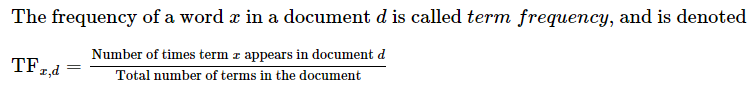


In [10]:
texts = [
    'I love to run',
    'the cat does not eat the fruit',
    'run to the cat',
    'I love to eat the fruit. fruit fruit fruit fruit'
]

In [11]:
# In document 4, the Term Frequency (TF) of the word FRUIT is?
# The word fruit appears 5 times
# There are 10 words in the document

5/10

0.5

**DOCUMENT FREQUENCY (DF)**

If a word appears in many documents of a corpus, it's not important to understand a particular document.

Example: on eurosport.com/football, the word "football" appears in every article, hence why the word football on this website is an unimportant word!

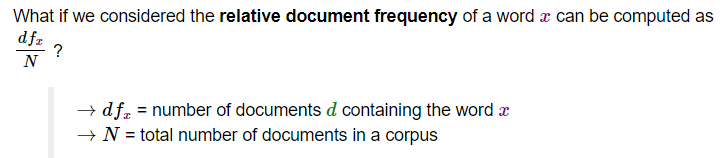

For the word "football" on Eurosport, we would expect this formula to be close to 1 since the number of docs containing the word "football" will probably only be slightly less than the total number of docs (out of 100 maybe only 5 don't have the word "football", so we get 95/100).

if the word "football" appears in all the articles it is not very useful for helping us identify between two articles, but if only a few documents contain words like "concussion" or "wellbeing", (e.g. they appear in 2/100 articles) it will be much more useful in determining the topic of that article (they are probably specifically about player wellfare).

💡 Thus the intuition of the term frequency - inverse document frequency approach is to give a high weight to any term which appears frequently in a single document, but not in too many documents of the corpus.

In [12]:
## ?? Which words appear frequently in our small corpus 
# and might not be useful for deriving meaning?

texts = [
    'I love to run',
    'the cat does not eat the fruit',
    'run to the cat',
    'I love to eat the fruit. fruit fruit fruit fruit'
]

# the
# to

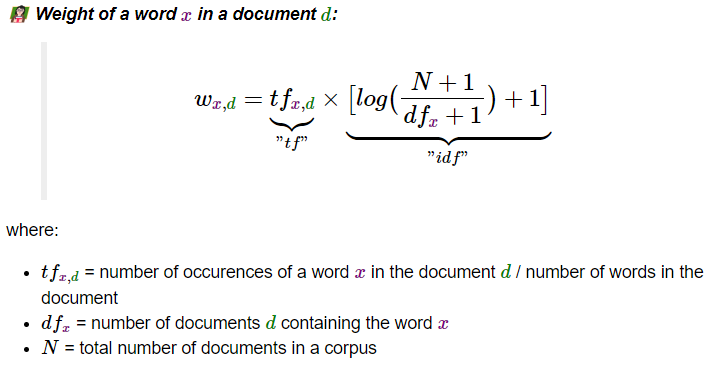

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiating the TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer()

# Training it on the texts
weighted_words = pd.DataFrame(tf_idf_vectorizer.fit_transform(texts).toarray(),
                 columns = tf_idf_vectorizer.get_feature_names_out(),
                index = texts)

weighted_words

,cat,does,eat,fruit,love,not,run,the,to
I love to run,0.000000,0.000000,0.000000,0.000000,0.613667,0.000000,0.613667,0.000000,0.496816
the cat does not eat the fruit,0.336350,0.426618,0.336350,0.336350,0.000000,0.426618,0.000000,0.544609,0.000000
run to the cat,0.549578,0.000000,0.000000,0.000000,0.000000,0.000000,0.549578,0.444931,0.444931
I love to eat the fruit. fruit fruit fruit fruit,0.000000,0.000000,0.187942,0.939709,0.187942,0.000000,0.000000,0.152155,0.152155


Weaknesses of this approach?

- word order still missing
- relationship between words still missing

## n-grams

In [14]:
# The two following sentences have the exact same representation in bag of words/ TFIDF approaches
# However, they have very different meanings!

sentences = [
    "I like cats but not dogs",
    "I like dogs but not cats"
]

In [15]:
# Vectorize the sentences
count_vectorizer = CountVectorizer()
sentences_vectorized = count_vectorizer.fit_transform(sentences)

# Show the representations in a nice DataFrame
sentences_vectorized = pd.DataFrame(
    sentences_vectorized.toarray(),
    columns = count_vectorizer.get_feature_names_out(),
    index = sentences
)

# Show the vectorized words
sentences_vectorized

,but,cats,dogs,like,not
I like cats but not dogs,1,1,1,1,1
I like dogs but not cats,1,1,1,1,1


🧑🏻‍🏫 When using a bag-of-words representation, an efficient way to capture context is to consider:

- the count of single tokens (unigrams)
- the count of pairs (bigrams), triplets (trigrams), and more generally sequences of n words, also known as n-grams

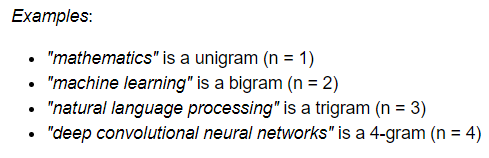 4)

😥 With a unigram vectorization, we couldn't distinguish two sentences with the same words, despite their meaning being quite different

In [16]:
sentences_vectorized

,but,cats,dogs,like,not
I like cats but not dogs,1,1,1,1,1
I like dogs but not cats,1,1,1,1,1


👩🏻‍🔬 What about a bigram vectorization?

In [17]:
# Vectorize the sentences
count_vectorizer_n_gram = CountVectorizer(ngram_range = (1,2)) # BI-GRAMS
sentences_vectorized_n_gram = count_vectorizer_n_gram.fit_transform(sentences)

# Show the representations in a nice DataFrame
sentences_vectorized_n_gram = pd.DataFrame(
    sentences_vectorized_n_gram.toarray(),
    columns = count_vectorizer_n_gram.get_feature_names_out(),
    index = sentences
)

# Show the vectorized movies with bigrams (pairs of words)
sentences_vectorized_n_gram

,but,but not,cats,cats but,dogs,dogs but,like,like cats,like dogs,not,not cats,not dogs
I like cats but not dogs,1,1,1,1,1,0,1,1,0,1,0,1
I like dogs but not cats,1,1,1,0,1,1,1,0,1,1,1,0


## Word2Vec embeddings

Attempting to capture semantic meaning of words in numerical format

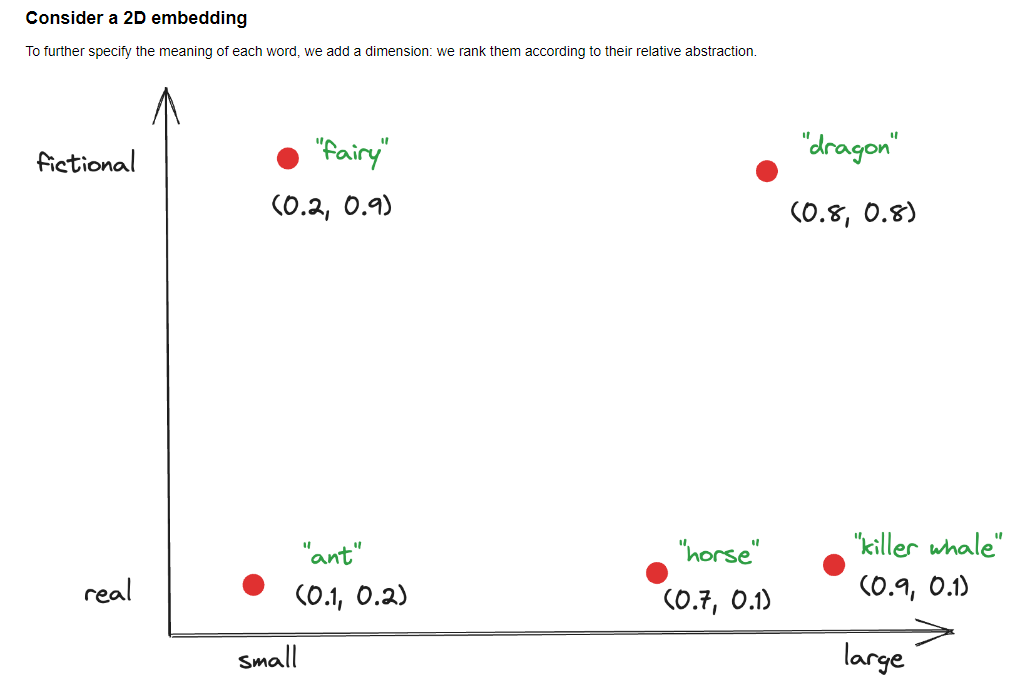

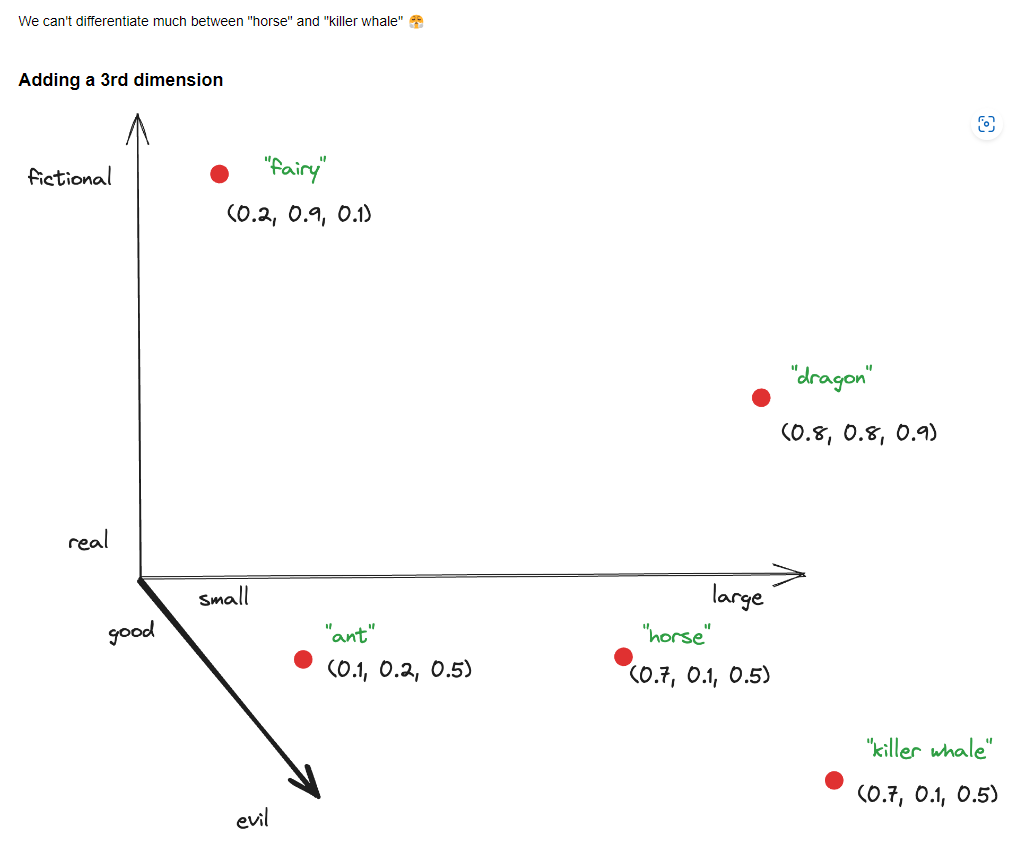

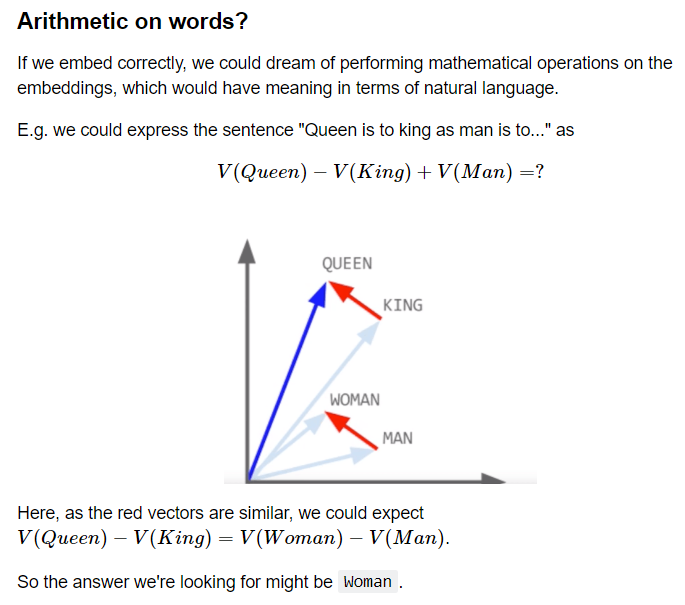

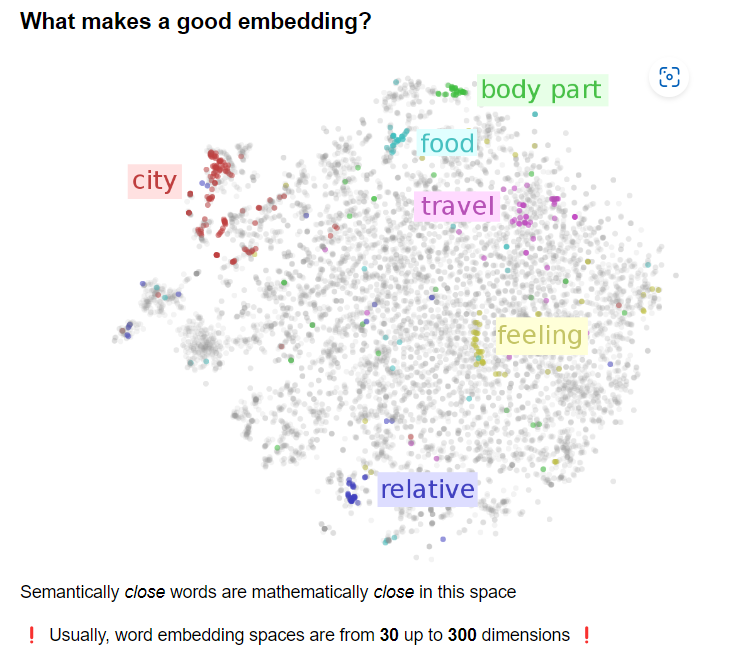

In [18]:
import gensim.downloader

# Lots of different pretrained embeddings we can use for free!
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [19]:
# We will use a vectoriser trained on Wikipedia today
model_wiki = gensim.downloader.load('glove-wiki-gigaword-50')

In [20]:
# Vectors based on 2B tweets, 27B tokens, 1.2M vocab!
# 50 dimensions
# N.B. Words not in glove-wiki-gigaword-50 will not have vectors computed. For example, if there was a niche word or acronym like "NHS-R" there would not be a vector for this word.

model_wiki["cat"]

array([ 0.45281 , -0.50108 , -0.53714 , -0.015697,  0.22191 ,  0.54602 ,
       -0.67301 , -0.6891  ,  0.63493 , -0.19726 ,  0.33685 ,  0.7735  ,
        0.90094 ,  0.38488 ,  0.38367 ,  0.2657  , -0.08057 ,  0.61089 ,
       -1.2894  , -0.22313 , -0.61578 ,  0.21697 ,  0.35614 ,  0.44499 ,
        0.60885 , -1.1633  , -1.1579  ,  0.36118 ,  0.10466 , -0.78325 ,
        1.4352  ,  0.18629 , -0.26112 ,  0.83275 , -0.23123 ,  0.32481 ,
        0.14485 , -0.44552 ,  0.33497 , -0.95946 , -0.097479,  0.48138 ,
       -0.43352 ,  0.69455 ,  0.91043 , -0.28173 ,  0.41637 , -1.2609  ,
        0.71278 ,  0.23782 ], dtype=float32)

In [21]:
# King is to Queen as Man is to ...

example_1 = model_wiki["queen"] - model_wiki["king"] + model_wiki["man"]
model_wiki.most_similar(example_1)[0]

('woman', 0.8903914093971252)

In [22]:
# Similar words to cat

model_wiki.most_similar(model_wiki["cat"])

[('cat', 1.0),
 ('dog', 0.9218006134033203),
 ('rabbit', 0.8487820625305176),
 ('monkey', 0.804108202457428),
 ('rat', 0.7891963124275208),
 ('cats', 0.7865270972251892),
 ('snake', 0.7798910140991211),
 ('dogs', 0.7795815467834473),
 ('pet', 0.7792249917984009),
 ('mouse', 0.7731667160987854)]

In [23]:
# Opposite of cold...?

example_2 = model_wiki["good"] - model_wiki["evil"] + model_wiki["cold"]
model_wiki.most_similar(example_2)[0]

('warm', 0.7870427966117859)

## Attention mechanism

The basis of transformer-based neural networks like ChatGPT! The paper that started it all: [Attention is all you need](https://arxiv.org/abs/1706.03762)

1) Each token (word) embedding gets projected ➡️ into 3 further vectors: the query, key and value vectors (usually 768 dimensions each)!!

2) We compute a scaled dot-product 🔴 on the query and key vectors to work out how much each word relates to those around it

3) Take these scores and normalize with softmax ⤵️

4) Multiply by our value vectors ❎, sum and pass to our dense neural network


⚠️ **TLDR**: The main point is that each word is now represented by 768 * 3 numbers! This is partly what makes LLMs so powerful (and resource-hungry) ⚠️

In the simple bag-of-words and TFIDF approaches, each word was represented by only 1 number each

In more complex word embeddings each word was represented by between 50 to 300 numbers each

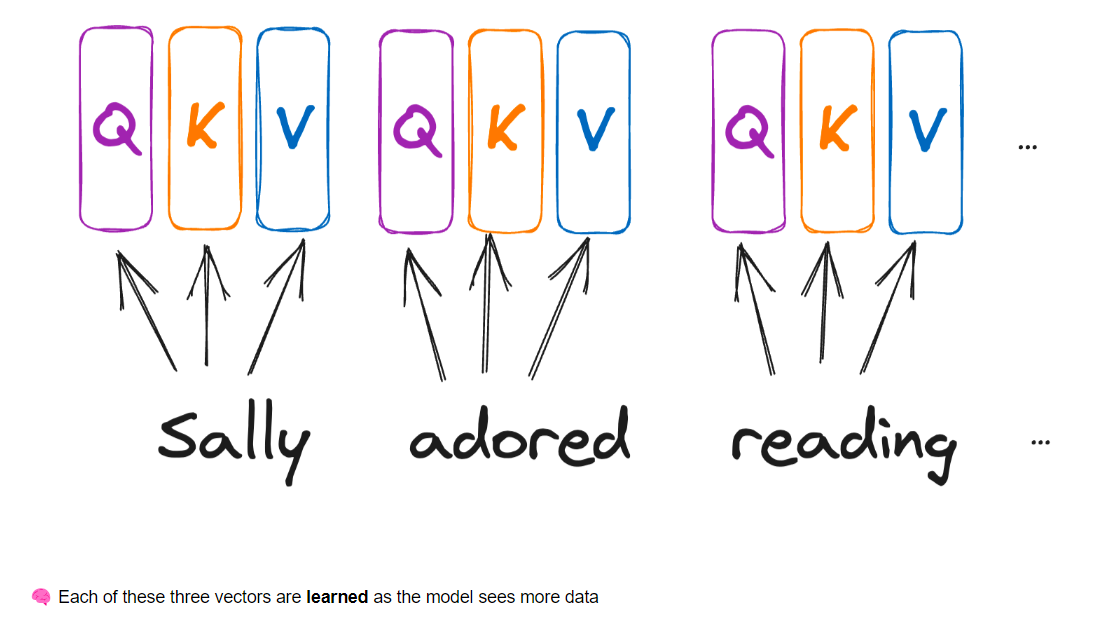

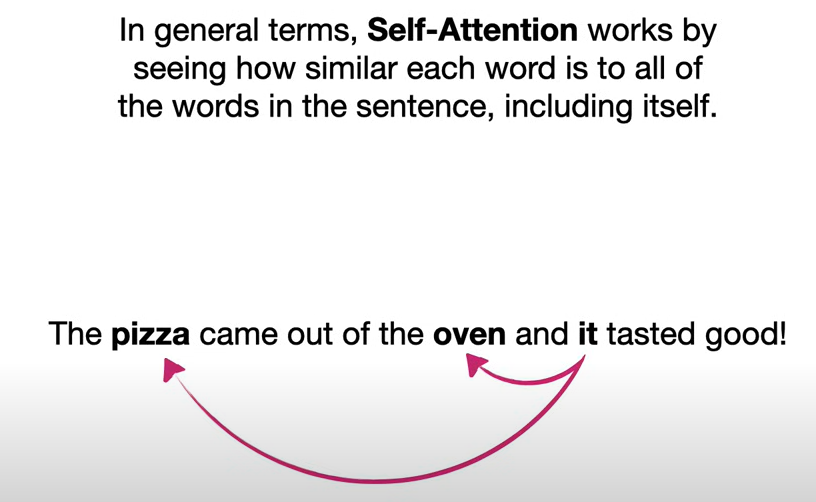

## Resources

- R text mining book https://www.tidytextmining.com/
- Huggingface tutorials (python) https://huggingface.co/learn/nlp-course/chapter1/1
- Great video on attention https://www.youtube.com/watch?v=zxQyTK8quyY